# Task2 Approximating linear vector fields

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import calculate_mse, load_datasets, estimate_vectors, plot_vector_field, phase_portrait
from scipy.integrate import solve_ivp

## Part1 Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

### First we load the dataset and show the distribution of 2 datasets

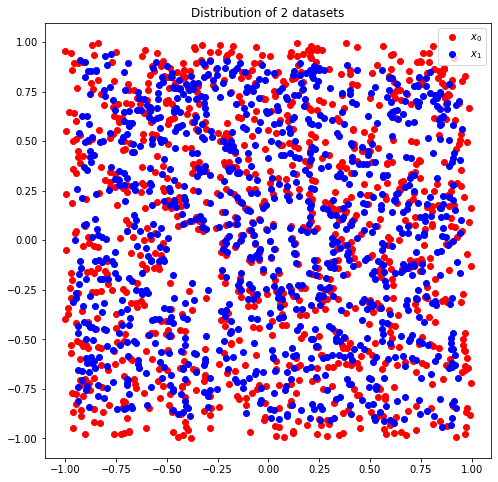

In [2]:
# Load the datasets
file_path_1 = '../data/linear_vectorfield_data_x0.txt'
file_path_2 = '../data/linear_vectorfield_data_x1.txt'
x0, x1 = load_datasets(file_path_1, file_path_2)

plt.figure(figsize=(8, 8))
plt.scatter(x0[:, 0], x0[:, 1], color='r', label='$x_0$')
plt.scatter(x1[:, 0], x1[:, 1], color='b', label='$x_1$')
plt.title("Distribution of 2 datasets")
plt.legend()
plt.show()

### Estimate the vectors v(k) and approximate the matrix A

In [3]:
dt = 0.1
A = estimate_vectors(x0, x1, dt)
print('Matrix A:')
print(A)


Matrix A:
[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


### Plot the vector field and solve the linear system

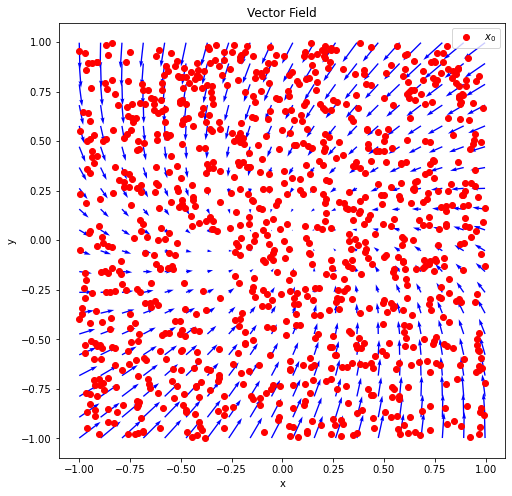

In [4]:
x_range = np.linspace(np.min(x0[:, 0]), np.max(x0[:, 0]), 20)
y_range = np.linspace(np.min(x0[:, 1]), np.max(x0[:, 1]), 20)
plot_vector_field(A, x_range, y_range, x0)

## Part2 Solve the linear system and compute the mean squared error

In [5]:
A_hat = A
Tend = dt
mse = calculate_mse(A_hat, x0, x1, Tend)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0030599275959897303


##  Part3 Choose the initial point (10, 10) amd again solve the linear system with your matrix approximation

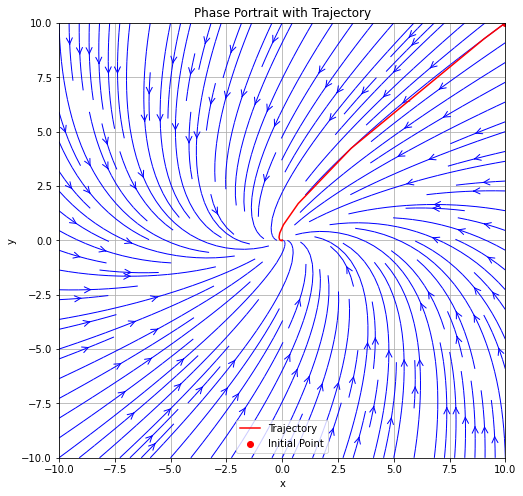

In [6]:
# Plot phase portrait with trajectory
def solve_linear_system(t, x):
    return A_hat.dot(x)

# Define the initial point (10, 10)
initial_point = np.array([10, 10])

# Define the time range for integration
Tend = 100
t_span = (0, Tend)

# Solve the linear system using the estimated matrix A_hat
sol = solve_ivp(solve_linear_system, t_span, initial_point, method='RK45')

# Extract the solution points
x_trajectory = sol.y.T

# Plot the phase portrait with trajectory
x_range = np.linspace(-10, 10, 20)
y_range = np.linspace(-10, 10, 20)

X, Y = np.meshgrid(x_range, y_range)

fig = plt.figure(figsize=(8, 8))
phase_portrait(A_hat, X, Y, title='Phase Portrait with Trajectory')
plt.plot(x_trajectory[:, 0], x_trajectory[:, 1], color='red', label='Trajectory')
plt.scatter(initial_point[0], initial_point[1], color='red', label='Initial Point')
plt.legend()
plt.show()